##  Breast Cancer data decomposition using PCA

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

Load the Breast Cancer data

In [44]:
data = load_breast_cancer()
feature_names = data.feature_names
targets = data.target

df = pd.DataFrame(data=data["data"], columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## IMPORTANT
If you want to decompose the dataset in which the difference between values in different columns is big, you should always use standard scaling!

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(data=scaled_data, columns=feature_names)
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)

print("Original data shape: ", scaled_data.shape)
print("Transformed data shape: ", transformed_data.shape)

trans_df = pd.DataFrame(data=transformed_data, columns=["principal_var_1", "principal_var_2"])
trans_df.head()

Original data shape:  (569, 30)
Transformed data shape:  (569, 2)


,principal_var_1,principal_var_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [110]:
test_subjects = df.loc[3:6,:]
scaled_test_subjects = scaler.transform(test_subjects)
pca_test_subjects = pca.transform(scaled_test_subjects)
pca_test_subjects = pd.DataFrame(data=pca_test_subjects, columns=["Principal_var_1", "Principal_var_2"])
pca_test_subjects.head()

C:\Users\ssipikal\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,Principal_var_1,Principal_var_2
0,7.122953,10.275589
1,3.935302,-1.948072
2,2.380247,3.949929
3,2.238883,-2.690031


Text(0.5, 1.0, 'PCA data decomposition from 30D to 2D')

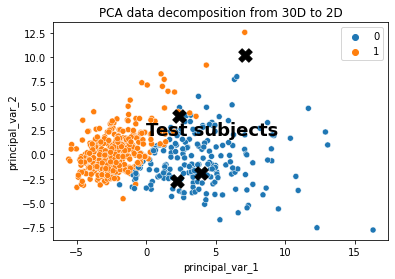

In [109]:
sn.scatterplot(data=trans_df, x="principal_var_1", y="principal_var_2", hue=targets)
plt.scatter(pca_test_subjects["Principal_var_1"], pca_test_subjects["Principal_var_2"], c="black", s=180, marker="X")
plt.annotate("Test subjects", (0, 2), size=18, weight="bold", color="black")
plt.title("PCA data decomposition from 30D to 2D")

Data are now clearly divided into two groups which we can further identify using e.g. SVM (Support Vector Machine).